In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples


newsgroups = fetch_20newsgroups(subset='train')

doc_index = 5 
print("Example document:")
print("------")
print(newsgroups.data[doc_index])  
print("------")
print("True label:", newsgroups.target_names[newsgroups.target[doc_index]])


vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups.data)

X_train, X_test, y_train, y_test = train_test_split(vectors, newsgroups.target, test_size=0.3, random_state=42)

num_clusters = 20
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X_train)

predicted_clusters = km.predict(X_test)

print("Adjusted Rand Index:", metrics.adjusted_rand_score(y_test, predicted_clusters))

Example document:
------
From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needles

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index: 0.09095085735332635


In [3]:
vectorizers = {
    "CountVectorizer": CountVectorizer(stop_words='english'),
    "TfidfVectorizer": TfidfVectorizer(stop_words='english')
}


num_clusters = 20  


for vec_name, vectorizer in vectorizers.items():
    print(f"Using {vec_name}")
    

    vectors = vectorizer.fit_transform(newsgroups.data)
    

    km = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
    km.fit(vectors)
    predicted_clusters = km.predict(vectors)

    silhouette_avg = silhouette_score(vectors, predicted_clusters)
    print(f"Le score de silhouette moyen est : {silhouette_avg}")
    
    ari = metrics.adjusted_rand_score(newsgroups.target, predicted_clusters)
    print(f"Adjusted Rand Index: {ari:.2f}\n")
    print (predicted_clusters)

Using CountVectorizer
Le score de silhouette moyen est : 0.8761298561624017
Adjusted Rand Index: 0.00

[10 10 10 ... 10 10 10]
Using TfidfVectorizer
Le score de silhouette moyen est : 0.006404853238215693
Adjusted Rand Index: 0.13

[ 0 17 12 ... 12 17 17]


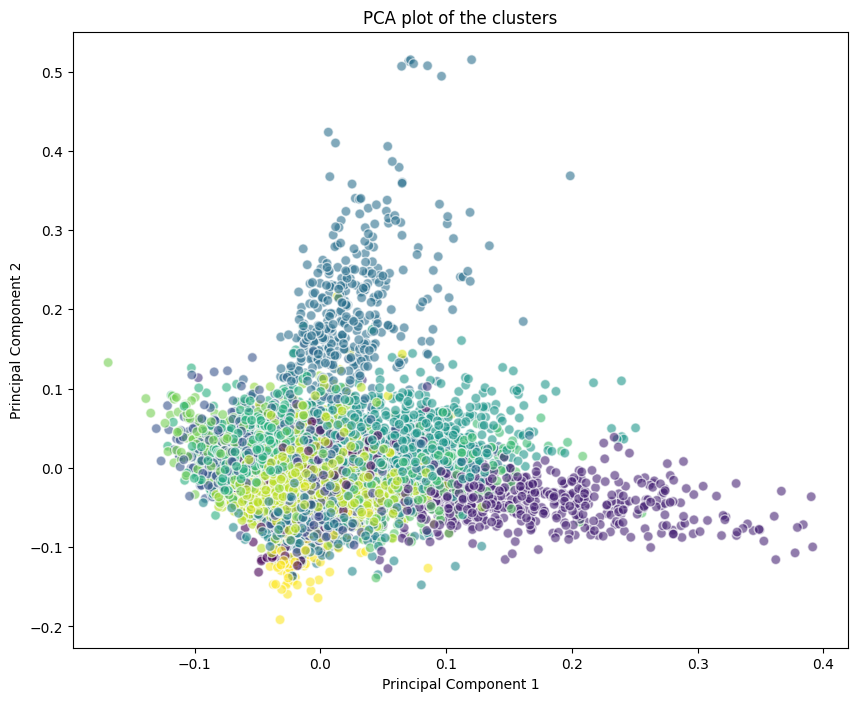

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire les données à 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(vectors.toarray())  # Notez que nous devons convertir les données en un tableau dense

# Créer un graphique scatter
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_clusters, cmap='viridis', s=50, alpha=0.6, edgecolors='w')
plt.title('PCA plot of the clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Afficher le graphique
plt.show()


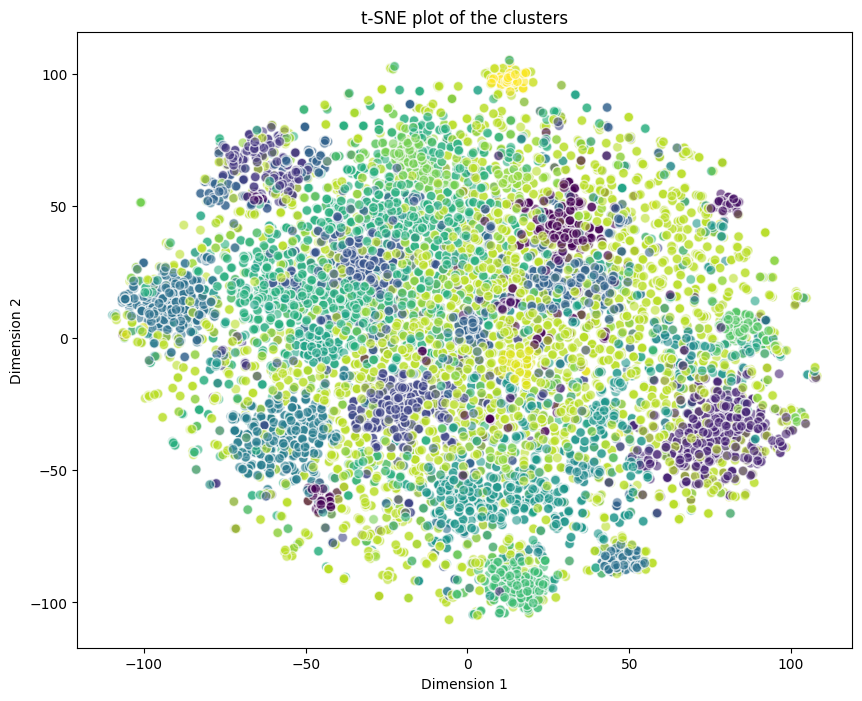

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Réduire les données à 2D
tsne = TSNE(n_components=2, init='random', random_state=0)  # Utilisation de l'initialisation aléatoire
X_2d = tsne.fit_transform(vectors)

# Créer un graphique scatter
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=predicted_clusters, cmap='viridis', s=50, alpha=0.6, edgecolors='w')
plt.title('t-SNE plot of the clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Afficher le graphique
plt.show()


In [4]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectoriser les données
vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(newsgroups.data)

# Appliquer LDA
num_topics = 20  # Par exemple, choisissez le nombre de sujets/clusters
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
doc_topic_distr = lda.fit_transform(data_vectorized)

# Assigner chaque document au sujet/cluster dont la probabilité est la plus élevée
predicted_clusters_lda = doc_topic_distr.argmax(axis=1)


Silhouette Score for K-Means: 0.006404853238215693
Silhouette Score for LDA: 0.0009385522399111747

Topic 1:


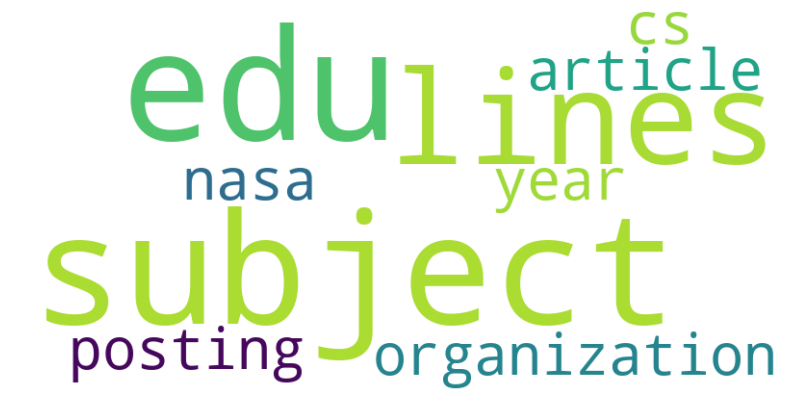


Topic 2:


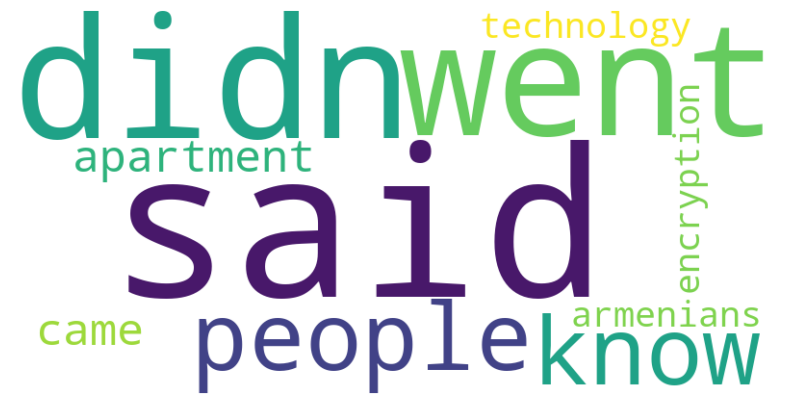


Topic 3:


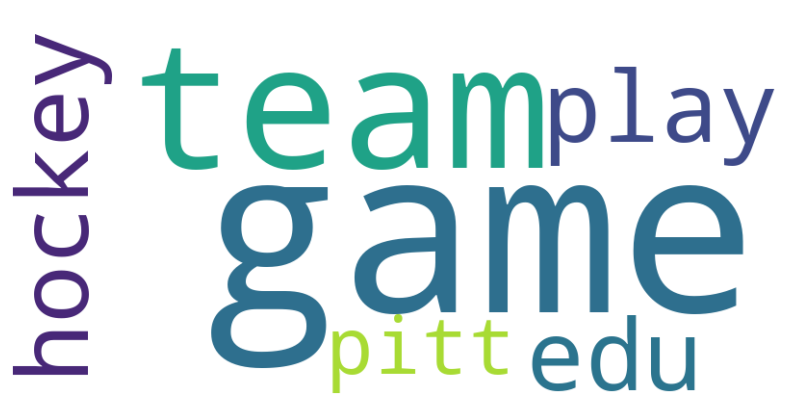


Topic 4:


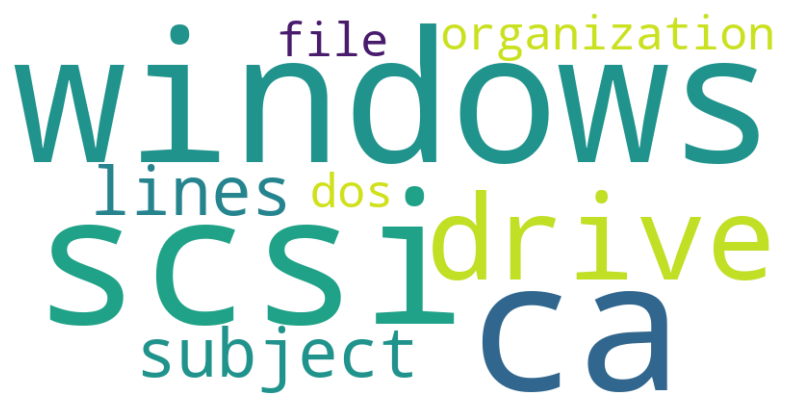


Topic 5:


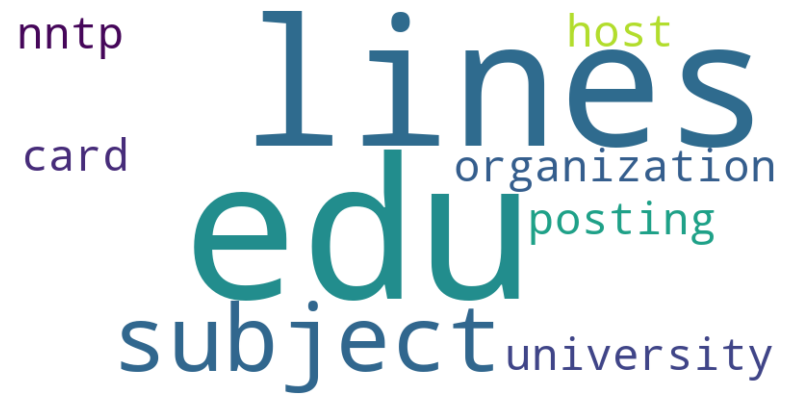


Topic 6:


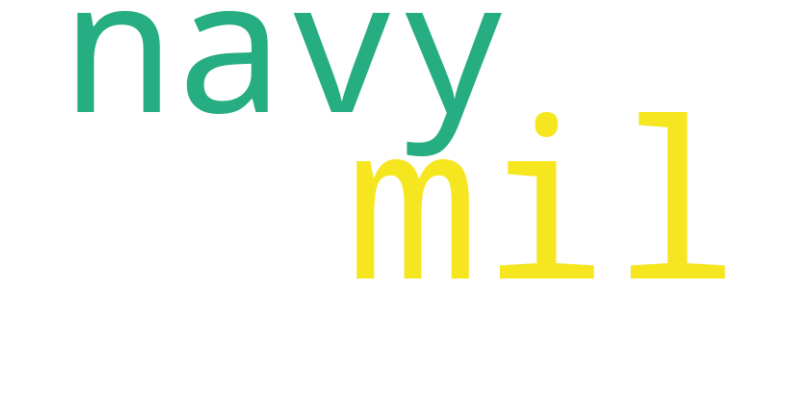


Topic 7:


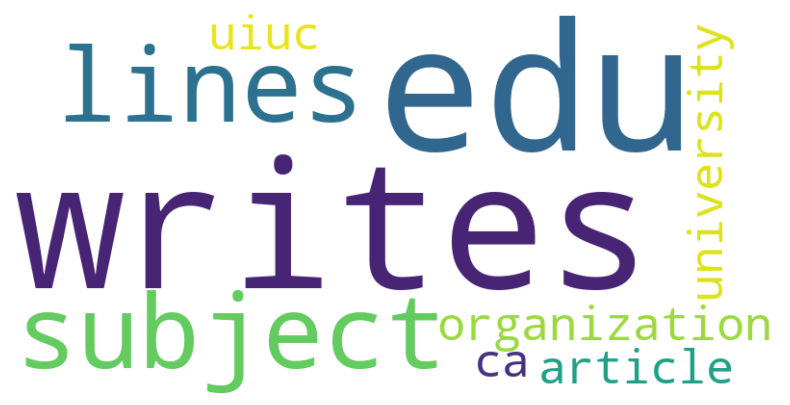


Topic 8:


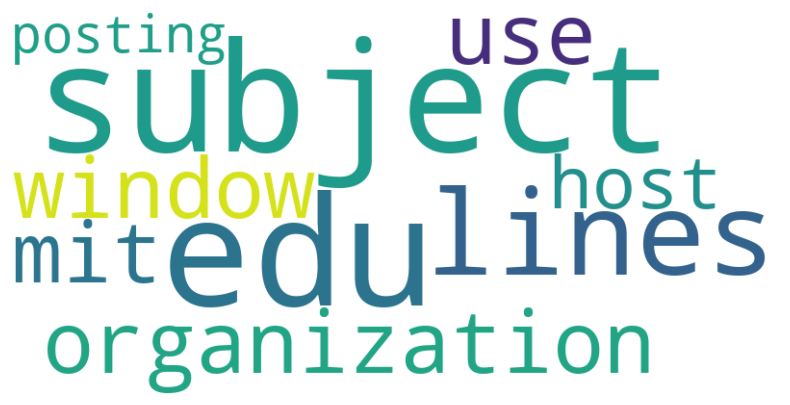


Topic 9:


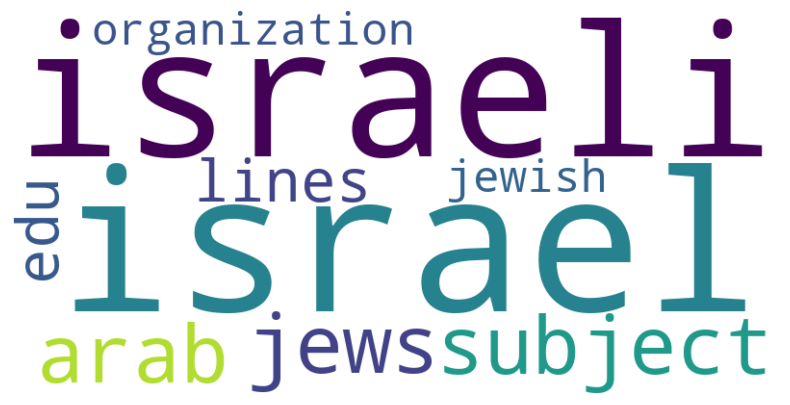


Topic 10:


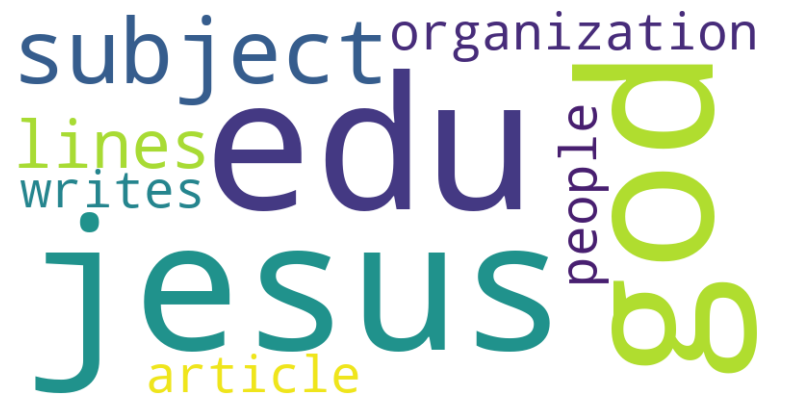


Topic 11:


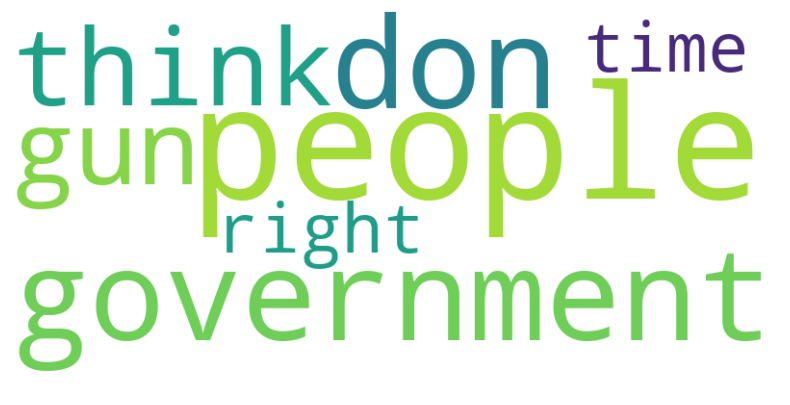


Topic 12:


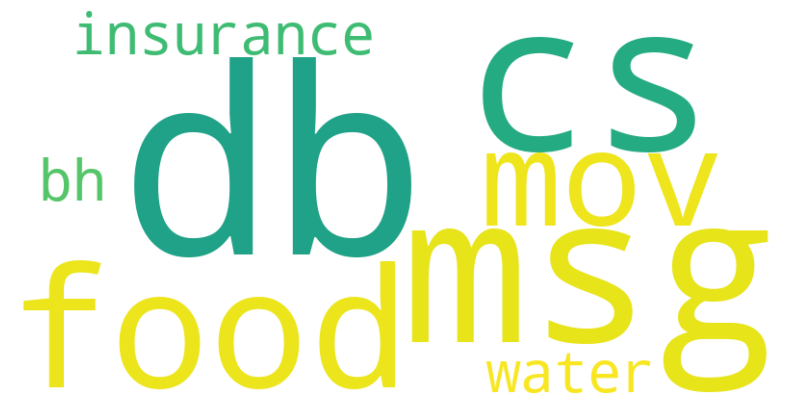


Topic 13:


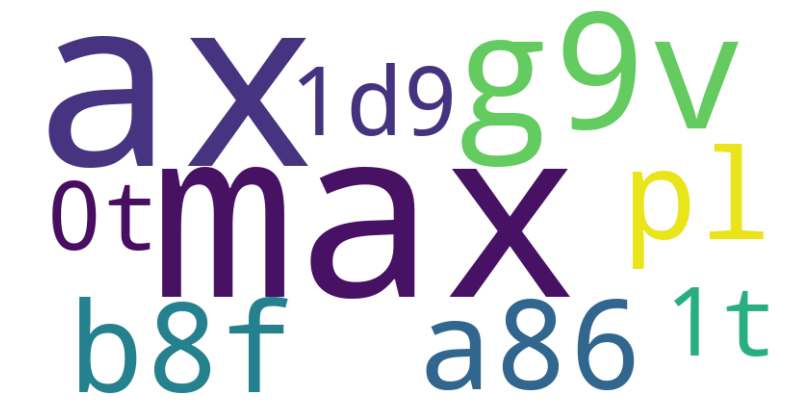


Topic 14:


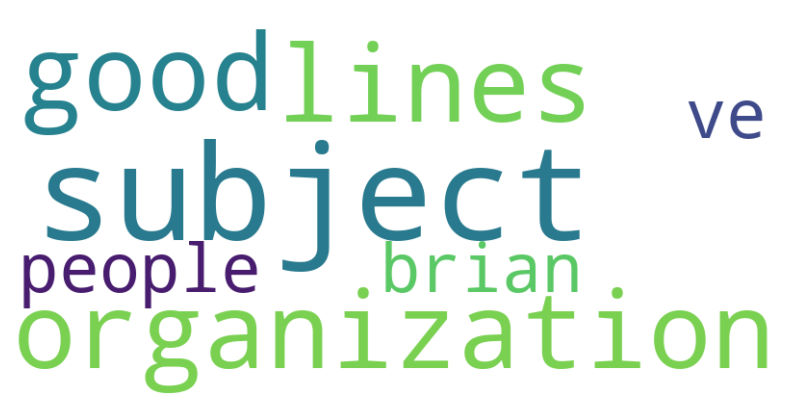


Topic 15:


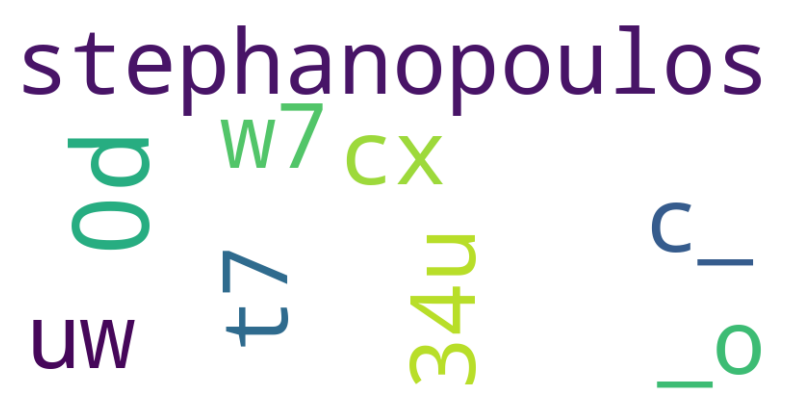


Topic 16:


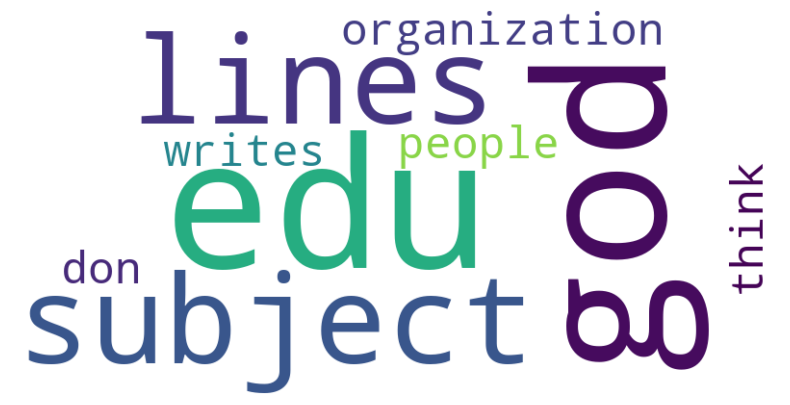


Topic 17:


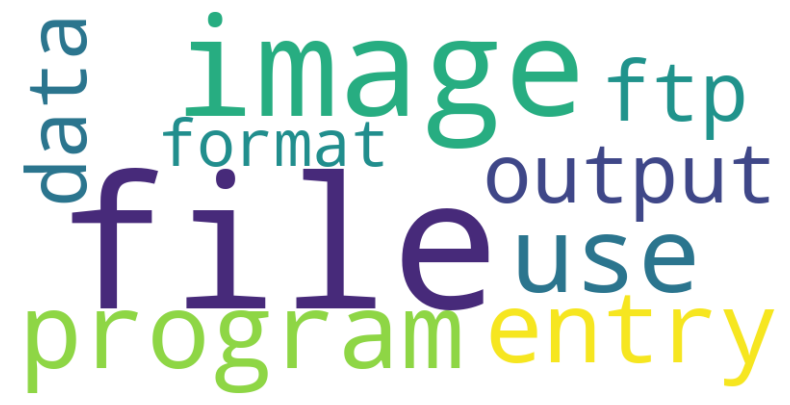


Topic 18:


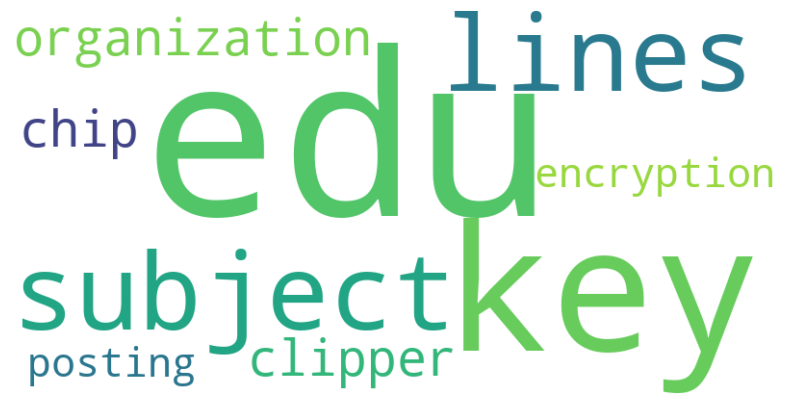


Topic 19:


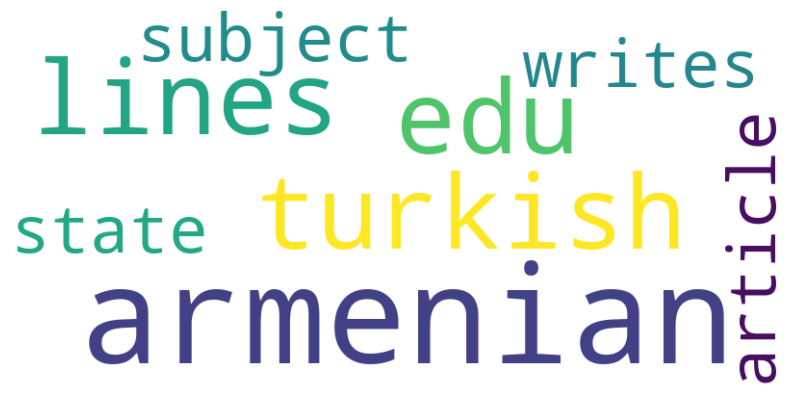


Topic 20:


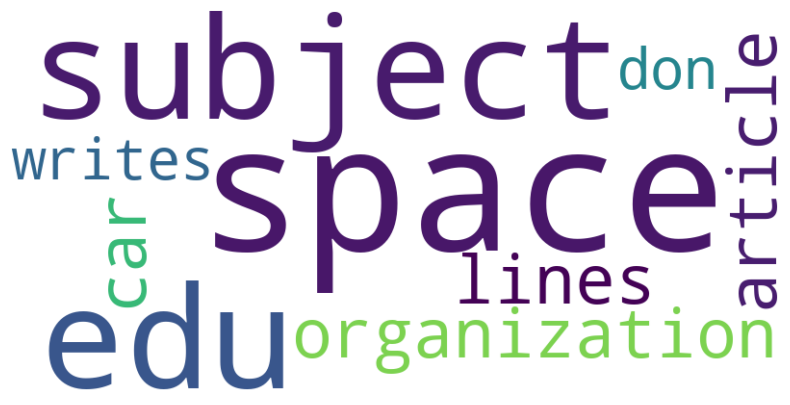

In [7]:
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculer le Silhouette Score
silhouette_kmeans = silhouette_score(vectors, predicted_clusters)
silhouette_lda = silhouette_score(vectors, predicted_clusters_lda)

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for LDA: {silhouette_lda}")

# Visualiser les mots-clés pour un cluster (pour LDA)
def display_wordcloud(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx+1}:")
        words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.show()

# Utilisez la fonction ci-dessus pour LDA
display_wordcloud(lda, vectorizer.get_feature_names_out(), 10)
